## imports

In [18]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("IRIS.csv")
profile = ProfileReport(df, title="My Data Report")

# Save as HTML file to view in browser
profile.to_file("data_report2.html")
print("Report saved as data_report.html - open it in your browser")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 91.01it/s]

Report saved as data_report.html - open it in your browser


In [21]:
df.dtypes
df.isnull().sum()

df["species"]=df["species"].map({"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()



np.int64(0)

In [26]:
target_name = "species"

x = df.drop(columns="species")
y = df[target_name]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9489130434782609


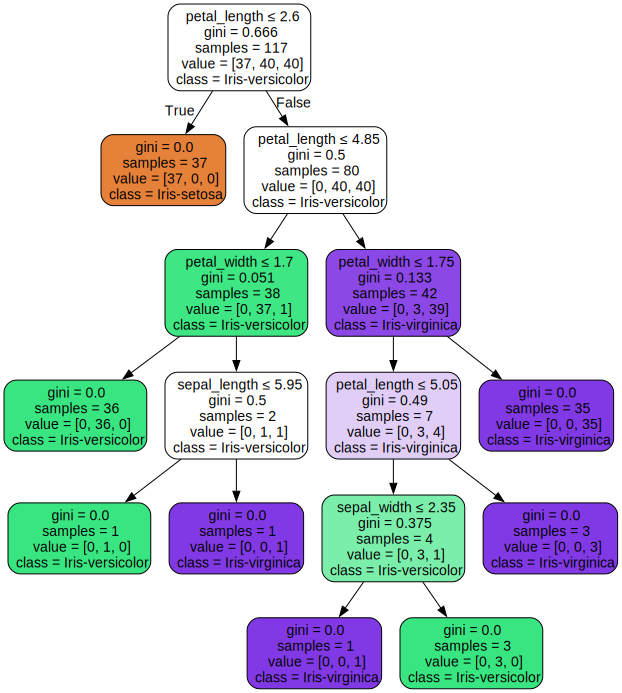

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # For classification tasks
    n_jobs=-1
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Best estimator
best_clf = grid_search.best_estimator_

# Predictions with best model
y_pred = best_clf.predict(x_test)


import graphviz
from sklearn.tree import export_graphviz

# Visualizing the Decision Tree with Graphviz
dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=x.columns,
    class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
    filled=True, rounded=True, special_characters=True
)

# Render the tree
graph = graphviz.Source(dot_data)
graph  # Displays the tree in Jupyter Notebook




In [31]:
# Evaluation metrics
print("\n=== Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\n=== Model Parameters ===")
print("Criterion:", best_clf.criterion)
print("Max Depth:", best_clf.max_depth)
print("Min Samples Split:", best_clf.min_samples_split)
print("Min Samples Leaf:", best_clf.min_samples_leaf)
print("Max Features:", best_clf.max_features)
print("Number of Features:", best_clf.n_features_in_)
print("Number of Classes:", best_clf.n_classes_)
print("Feature Importances:", best_clf.feature_importances_)


=== Model Performance ===
Accuracy: 0.9333333333333333
F1 Score: 0.9333333333333333

=== Model Parameters ===
Criterion: gini
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1
Max Features: None
Number of Features: 4
Number of Classes: 3
Feature Importances: [0.01282895 0.01924342 0.92828329 0.03964434]
